# Linear regression classification 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
X_train = np.asarray(pd.read_csv("training_data.csv"))
y_train = np.asarray(pd.read_csv("training_label.csv"))
X_test = np.asarray(pd.read_csv("testing_data.csv"))
y_test = np.asarray(pd.read_csv("testing_label.csv"))

In [71]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

In [72]:
# normalize data (Min-Max Normalization)

In [73]:
def noramlization(data):
    minVals = data.min(0)
    maxVals = data.max(0)
    ranges = maxVals - minVals
    normData = np.zeros(np.shape(data))
    m = data.shape[0]
    normData = data - np.tile(minVals, (m, 1))
    normData = normData/np.tile(ranges, (m, 1))
    return normData

In [74]:
def z_score(x, axis):
    xr = np.rollaxis(x, axis=axis)
    xr -= np.mean(x, axis=axis)
    xr /= np.std(x, axis=axis)
    # print(x)
    return x

In [75]:
X_train = z_score(X_train,0)
X_test = z_score(X_test,0)

In [76]:
# First let's try the simple least square problem  

# Least square solution 

In [77]:
n_train = len(X_train)
k_fold = 5
id_train = [[]] * k_fold
id_val = [[]] * k_fold

for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [78]:
Val_Acc = []
Sq_err = []
W_less = 100

In [79]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_train[id_train[m]]
    y_train_r = y_train[id_train[m]]
    X_val_r = X_train[id_val[m]]
    y_val_r = y_train[id_val[m]]     
 #   print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #validation
    W_least = np.linalg.inv(X_train_r.T@X_train_r)@X_train_r.T@y_train_r
    y_hat = np.sign(X_val_r @ W_least)
    error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
                
    Sq_err_vec = [ (it[0]-it[1])**2 for it in np.hstack((y_hat, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Val_Acc.append(1-err_rate)
    Sq_err.append(sq_err)
    
    if err_rate < W_less:
        W_less = err_rate
        best_w = W_least
    
    print("Validation Accuracy:", (1-err_rate)*100,"%")
    print("Validation mean square error:", sq_err)


 iteration 0
Validation Accuracy: 58.9041095890411 %
Validation mean square error: 1.643835616438356

 iteration 1
Validation Accuracy: 49.31506849315068 %
Validation mean square error: 2.0273972602739727

 iteration 2
Validation Accuracy: 51.388888888888886 %
Validation mean square error: 1.9444444444444444

 iteration 3
Validation Accuracy: 47.22222222222222 %
Validation mean square error: 2.111111111111111

 iteration 4
Validation Accuracy: 51.388888888888886 %
Validation mean square error: 1.9444444444444444


In [80]:
print("The Least square solution result:\n")
print("The accuracy of each validation:\n",Val_Acc)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best weighted values:\n",best_w)
print("\n")
print("The average number of accuracy rate:\n",sum(Val_Acc)/len(Val_Acc))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Least square solution result:

The accuracy of each validation:
 [0.589041095890411, 0.4931506849315068, 0.5138888888888888, 0.4722222222222222, 0.5138888888888888]


The mean squared error of each validation:
 [1.643835616438356, 2.0273972602739727, 1.9444444444444444, 2.111111111111111, 1.9444444444444444]


The best weighted values:
 [[-0.01896881]
 [ 0.0626032 ]
 [ 0.17975799]
 [-0.04016948]
 [ 0.03746964]
 [-0.00667443]
 [-0.09270972]
 [-0.00135062]
 [ 0.07833817]
 [-0.06211381]
 [ 0.02662307]
 [ 0.05475716]]


The average number of accuracy rate:
 0.5164383561643835


The mean squared error:
 1.9342465753424658


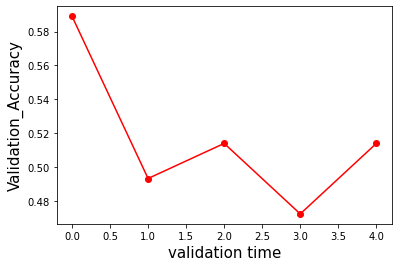

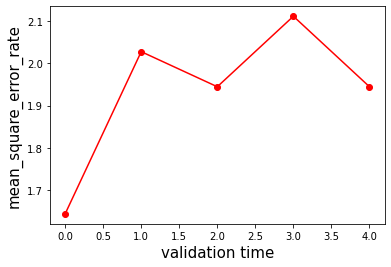

In [81]:
plt.plot(Val_Acc,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("Validation_Accuracy", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()

In [82]:
# Testing results
y_hat3 = np.sign(X_test @ best_w)
error_vec3 = [0 if it[0]==it[1] else 1 for it in np.hstack((y_hat3, y_test))]
acc_rate3 = 1-sum(error_vec3)/len(y_test)

Sq_err_vec3 = [ (it[0]-it[1])**2 for it in np.hstack((y_hat3, y_test))]
sq_err3 = sum(Sq_err_vec3)/len(y_test)

print("testing_accuracy:",acc_rate3)
print("mean_square_error_rate",sq_err3)

testing_accuracy: 0.46451612903225803
mean_square_error_rate 2.141935483870968


# Ridge regression 

In [89]:
Val_Acc = []
Sq_err = []
Be_lam = []

In [90]:
lam_vals = np.logspace(-10,1, num=30)
print("lambda:",lam_vals)

lambda: [1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]


In [91]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_train[id_train[m]]
    y_train_r = y_train[id_train[m]]
    X_val_r = X_train[id_val[m]]
    y_val_r = y_train[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    Error_rate_low = 100
    for i in range(len(lam_vals)):
        W_ridge = np.linalg.inv(X_train_r.T@X_train_r+lam_vals[i]*np.identity(X_train_r.shape[1]))@ X_train_r.T @y_train_r
        y_hat = np.sign(X_val_r @ W_ridge)
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_lam = lam_vals[i]
            best_w = W_ridge
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat2, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat2, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Val_Acc.append(1-err_rate)
    Sq_err.append(sq_err)
    Be_lam.append(best_lam)
    
    print("Validation Accuracy:", (1-err_rate)*100,"%")
    print("Validation mean square error:", sq_err)


 iteration 0
Validation Accuracy: 64.24657534246577 %
Validation mean square error: 1.5890410958904109

 iteration 1
Validation Accuracy: 58.082191780821944 %
Validation mean square error: 1.8630136986301369

 iteration 2
Validation Accuracy: 57.50000000000003 %
Validation mean square error: 1.8888888888888888

 iteration 3
Validation Accuracy: 52.500000000000036 %
Validation mean square error: 2.111111111111111

 iteration 4
Validation Accuracy: 58.75000000000002 %
Validation mean square error: 1.8333333333333333


In [92]:
print("The Ridge regression result:\n")
print("The accuracy of each validation:\n",Val_Acc)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best lambda value of each validation:\n",Be_lam)
print("\n")
print("The best weighted values:\n",best_w)
print("\n")
print("The average number of accuracy rate:\n",sum(Val_Acc)/len(Val_Acc))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Ridge regression result:

The accuracy of each validation:
 [0.6424657534246577, 0.5808219178082195, 0.5750000000000003, 0.5250000000000004, 0.5875000000000002]


The mean squared error of each validation:
 [1.5890410958904109, 1.8630136986301369, 1.8888888888888888, 2.111111111111111, 1.8333333333333333]


The best lambda value of each validation:
 [10.0, 10.0, 1.7433288221999872, 1e-10, 10.0]


The best weighted values:
 [[ 0.05573183]
 [-0.02220652]
 [ 0.19313862]
 [ 0.02413075]
 [ 0.04119367]
 [-0.00475395]
 [ 0.00037664]
 [-0.01903349]
 [-0.04214778]
 [-0.10694655]
 [ 0.0020995 ]
 [ 0.04698217]]


The average number of accuracy rate:
 0.5821575342465757


The mean squared error:
 1.8570776255707764


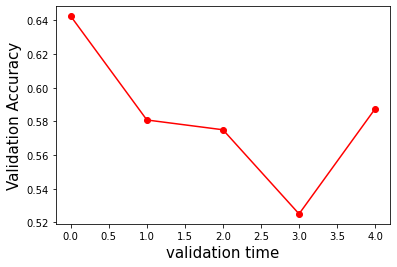

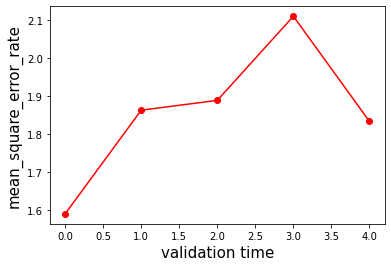

In [93]:
plt.plot(Val_Acc,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("Validation Accuracy", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()

In [94]:
# Testing results
y_hat3 = np.sign(X_test @ best_w)
error_vec3 = [0 if it[0]==it[1] else 1 for it in np.hstack((y_hat3, y_test))]
acc_rate3 = sum(error_vec3)/len(y_test)

Sq_err_vec3 = [ (it[0]-it[1])**2 for it in np.hstack((y_hat3, y_test))]
sq_err3 = sum(Sq_err_vec3)/len(y_test)

print("testing_accuracy:",1-acc_rate3)
print("mean_square_error_rate",sq_err3)

testing_accuracy: 0.5354838709677421
mean_square_error_rate 2.064516129032258


# LASSO Regression 

In [95]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [96]:
Val_Acc = []
Sq_err = []
Be_lam = []

lam_vals = np.logspace(-10,1, num=30)
print("lambda:",lam_vals)

lambda: [1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]


In [97]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_train[id_train[m]]
    y_train_r = y_train[id_train[m]]
    X_val_r = X_train[id_val[m]]
    y_val_r = y_train[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    W_lasso = ista_solve_hot(X_train_r,y_train_r,lam_vals)
    Error_rate_low = 100
    for i in range(W_lasso.shape[1]):
        y_hat = np.sign(X_val_r @ W_lasso[:,i]).reshape(y_val_r.shape[0],1)   
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_lam = lam_vals[i]
            best_w = W_lasso[:,i]
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w).reshape(y_val_r.shape[0],1)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat2, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat2, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Val_Acc.append(1-err_rate)
    Sq_err.append(sq_err)
    Be_lam.append(best_lam)
    
    print("Validation accuracy:", (1-err_rate)*100,"%")
    print("Validation mean square error:", sq_err)


 iteration 0
Validation accuracy: 60.273972602739725 %
Validation mean square error: 1.5890410958904109

 iteration 1
Validation accuracy: 60.273972602739725 %
Validation mean square error: 1.5890410958904109

 iteration 2
Validation accuracy: 52.77777777777778 %
Validation mean square error: 1.8888888888888888

 iteration 3
Validation accuracy: 50.0 %
Validation mean square error: 2.0

 iteration 4
Validation accuracy: 55.55555555555556 %
Validation mean square error: 1.7777777777777777


In [98]:
print("The LASSO regression result:\n")
print("The accuracy of each validation:\n",Val_Acc)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best lambda value of each validation:\n",Be_lam)
print("\n")
print("The best weighted values:\n",best_w)
print("\n")
print("The average number of accuracy:\n",sum(Val_Acc)/len(Val_Acc))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The LASSO regression result:

The accuracy of each validation:
 [0.6027397260273972, 0.6027397260273972, 0.5277777777777778, 0.5, 0.5555555555555556]


The mean squared error of each validation:
 [1.5890410958904109, 1.5890410958904109, 1.8888888888888888, 2.0, 1.7777777777777777]


The best lambda value of each validation:
 [1e-10, 10.0, 1e-10, 4.175318936560392, 10.0]


The best weighted values:
 [ 2.95496140e-02 -0.00000000e+00  1.75855574e-01  1.19229480e-04
  1.61456963e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.11147256e-02 -8.36020869e-02  0.00000000e+00  2.94824871e-02]


The average number of accuracy:
 0.5577625570776256


The mean squared error:
 1.7689497716894977


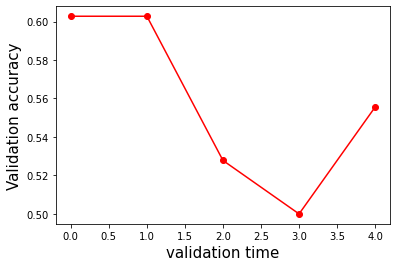

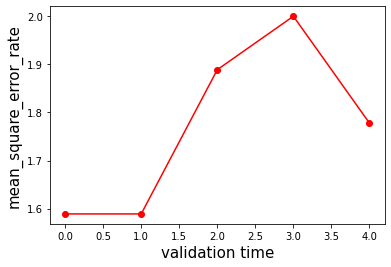

In [99]:
plt.plot(Val_Acc,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("Validation accuracy", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()

In [100]:
# Testing results
y_hat3 = np.sign(X_test @ best_w).reshape(y_test.shape[0],1)
error_vec3 = [0 if it[0]==it[1] else 1 for it in np.hstack((y_hat3, y_test))]
acc_rate3 = 1-sum(error_vec3)/len(y_test)

Sq_err_vec3 = [ (it[0]-it[1])**2 for it in np.hstack((y_hat3, y_test))]
sq_err3 = sum(Sq_err_vec3)/len(y_test)

print("testing_accuracy:",acc_rate3)
print("mean_square_error_rate",sq_err3)

testing_accuracy: 0.47096774193548385
mean_square_error_rate 2.1161290322580646


# Truncated SVD

In [101]:
Val_Acc = []
Sq_err = []
Be_rank = []

In [102]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_train[id_train[m]]
    y_train_r = y_train[id_train[m]]
    X_val_r = X_train[id_val[m]]
    y_val_r = y_train[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    U,s,VT = np.linalg.svd(X_train_r,full_matrices=False)
    
    Error_rate_low = 100
    for r in range(len(s)):
        W_SVD = VT.T[:,:(r+1)]@ np.diag(1/s[:(r+1)])@ U.T[:(r+1),:] @ y_train_r
        
        y_hat = np.sign(X_val_r @ W_SVD).reshape(y_val_r.shape[0],1)   
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_rank = r+1
            best_w = W_SVD
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Val_Acc.append(1-err_rate)
    Sq_err.append(sq_err)
    Be_rank.append(best_rank)
    
    print("Validation accuracy:", (1-err_rate)*100,"%")
    print("Validation mean square error:", sq_err)


 iteration 0
Validation accuracy: 58.9041095890411 %
Validation mean square error: 1.643835616438356

 iteration 1
Validation accuracy: 49.31506849315068 %
Validation mean square error: 2.0273972602739727

 iteration 2
Validation accuracy: 51.388888888888886 %
Validation mean square error: 1.9444444444444444

 iteration 3
Validation accuracy: 47.22222222222222 %
Validation mean square error: 2.111111111111111

 iteration 4
Validation accuracy: 51.388888888888886 %
Validation mean square error: 1.9444444444444444


In [103]:
print("The Truncated SVD result:\n")
print("The accuracy of each validation:\n",Val_Acc)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best weighted values:\n",best_w)
print("\n")
print("The best rank_approximation of each validation:\n",Be_rank)
print("\n")
print("The average number of accuracy rate:\n",sum(Val_Acc)/len(Val_Acc))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Truncated SVD result:

The accuracy of each validation:
 [0.589041095890411, 0.4931506849315068, 0.5138888888888888, 0.4722222222222222, 0.5138888888888888]


The mean squared error of each validation:
 [1.643835616438356, 2.0273972602739727, 1.9444444444444444, 2.111111111111111, 1.9444444444444444]


The best weighted values:
 [[ 0.0191759 ]
 [ 0.01884732]
 [ 0.10264142]
 [-0.01507769]
 [-0.01062672]
 [-0.00214061]
 [ 0.06172272]
 [-0.02085422]
 [ 0.03797311]
 [-0.08628553]
 [ 0.06698872]
 [ 0.03219334]]


The best rank_approximation of each validation:
 [2, 2, 1, 2, 7]


The average number of accuracy rate:
 0.5164383561643835


The mean squared error:
 1.9342465753424658


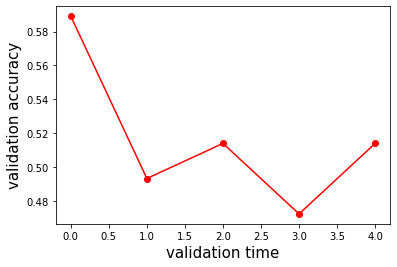

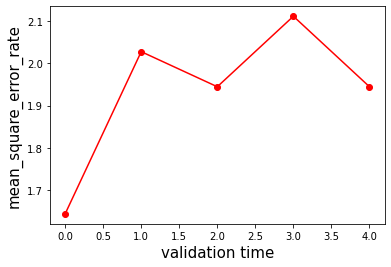

In [104]:
plt.plot(Val_Acc,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("validation accuracy", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()

In [105]:
# Testing results
y_hat3 = np.sign(X_test @ best_w).reshape(y_test.shape[0],1)
error_vec3 = [0 if it[0]==it[1] else 1 for it in np.hstack((y_hat3, y_test))]
Acc_rate3 = 1-sum(error_vec3)/len(y_test)

Sq_err_vec3 = [ (it[0]-it[1])**2 for it in np.hstack((y_hat3, y_test))]
sq_err3 = sum(Sq_err_vec3)/len(y_test)

print("testing_accuracy:",Acc_rate3)
print("mean_square_error_rate",sq_err3)

testing_accuracy: 0.4774193548387097
mean_square_error_rate 2.0903225806451613


As we can see after useing several linear regression approaches, the prediction result did not seems good, so let's do a feature selection to see whether if we can get good results.  

# Feature selection results:

In [32]:
features_selected1 = ["X","Y","month","day","FFMC","DMC","DC","ISI"]
features_selected2 = ["X","Y","month","day","temp","RH","wind","rain"]
# features_selected3 = ["FFMC","DMC","DC","ISI"]
# features_selected4 = ["temp","RH","wind","rain"]

In [33]:
X_train1 = pd.read_csv("training_data.csv")[features_selected1]
y_train = pd.read_csv("training_label.csv")
X_test1 = pd.read_csv("testing_data.csv")[features_selected1]
y_test = pd.read_csv("testing_label.csv")

In [34]:
X_train1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI
0,6,6,7,1,94.2,62.3,442.9,11.0
1,7,4,9,5,92.4,117.9,668.0,12.2
2,3,4,2,3,86.9,6.6,18.7,3.2
3,6,5,5,6,85.1,28.0,113.8,3.5
4,2,2,9,5,92.4,117.9,668.0,12.2


In [35]:
X_train2 = pd.read_csv("training_data.csv")[features_selected2]
X_test2 = pd.read_csv("testing_data.csv")[features_selected2]

In [36]:
X_train2.head()

,X,Y,month,day,temp,RH,wind,rain
0,6,6,7,1,23.0,36,3.1,0.0
1,7,4,9,5,19.0,34,5.8,0.0
2,3,4,2,3,8.8,35,3.1,0.0
3,6,5,5,6,11.3,94,4.9,0.0
4,2,2,9,5,19.6,33,5.4,0.0


In [37]:
# X_train3 = pd.read_csv("training_data.csv")[features_selected3]
# X_test3 = pd.read_csv("testing_data.csv")[features_selected3]

In [38]:
# X_train3.head()

In [39]:
# X_train4 = pd.read_csv("training_data.csv")[features_selected4]
# X_test4 = pd.read_csv("testing_data.csv")[features_selected4]

In [40]:
# X_train4.head()

In [41]:
# feature selected 1 

In [42]:
X_tr1 = np.asarray(X_train1)
y_tr = np.asarray(y_train)
X_te1 = np.asarray(X_test1)
y_te = np.asarray(y_test)

In [43]:
X_tr1 = z_score(X_tr1,0)
X_te1 = z_score(X_te1,0)

In [44]:
Val_Acc = []
Sq_err = []
Be_lam = []

lam_vals = np.logspace(-10,1, num=30)
print("lambda:",lam_vals)

lambda: [1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]


In [45]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_tr1[id_train[m]]
    y_train_r = y_tr[id_train[m]]
    X_val_r = X_tr1[id_val[m]]
    y_val_r = y_tr[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    Error_rate_low = 100
    for i in range(len(lam_vals)):
        W_ridge = np.linalg.inv(X_train_r.T@X_train_r+lam_vals[i]*np.identity(X_train_r.shape[1]))@ X_train_r.T @y_train_r
        y_hat = np.sign(X_val_r @ W_ridge)
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_lam = lam_vals[i]
            best_w = W_ridge
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat2, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat2, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Val_Acc.append(1-err_rate)
    Sq_err.append(sq_err)
    Be_lam.append(best_lam)
    
    print("Validation accuracy:", (1-err_rate)*100,"%")
    print("Validation mean square error:", sq_err)


 iteration 0
Validation accuracy: 60.273972602739725 %
Validation mean square error: 1.5890410958904109

 iteration 1
Validation accuracy: 53.42465753424658 %
Validation mean square error: 1.8630136986301369

 iteration 2
Validation accuracy: 54.16666666666667 %
Validation mean square error: 1.8333333333333333

 iteration 3
Validation accuracy: 47.22222222222222 %
Validation mean square error: 2.111111111111111

 iteration 4
Validation accuracy: 48.611111111111114 %
Validation mean square error: 2.0555555555555554


In [46]:
print("The Ridge regression of selected features result:\n")
print("The accuracy of each validation:\n",Val_Acc)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best lambda value of each validation:\n",Be_lam)
print("\n")
print("The best weighted values:\n",best_w)
print("\n")
print("The average number of accuracy rate:\n", sum(Val_Acc)/len(Val_Acc))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Ridge regression of selected features result:

The accuracy of each validation:
 [0.6027397260273972, 0.5342465753424658, 0.5416666666666667, 0.4722222222222222, 0.48611111111111116]


The mean squared error of each validation:
 [1.5890410958904109, 1.8630136986301369, 1.8333333333333333, 2.111111111111111, 2.0555555555555554]


The best lambda value of each validation:
 [4.175318936560392, 4.175318936560392, 1e-10, 1e-10, 10.0]


The best weighted values:
 [[ 0.05144504]
 [-0.02079022]
 [ 0.21335101]
 [ 0.00970164]
 [ 0.07172265]
 [-0.0362466 ]
 [-0.01486826]
 [-0.01938861]]


The average number of accuracy rate:
 0.5273972602739726


The mean squared error:
 1.8904109589041096


In [47]:
# Testing results
y_hat3 = np.sign(X_te1 @ best_w)
error_vec3 = [0 if it[0]==it[1] else 1 for it in np.hstack((y_hat3, y_test))]
acc_rate3 = 1-sum(error_vec3)/len(y_test)

Sq_err_vec3 = [ (it[0]-it[1])**2 for it in np.hstack((y_hat3, y_test))]
sq_err3 = sum(Sq_err_vec3)/len(y_test)

print("testing_accuracy:", acc_rate3)
print("mean_square_error_rate",sq_err3)

testing_accuracy: 0.4774193548387097
mean_square_error_rate 2.0903225806451613


In [48]:
# feature selected 2 

In [49]:
X_tr2 = np.asarray(X_train2)
X_te2 = np.asarray(X_test2)

In [50]:
X_tr2 = z_score(X_tr2,0)
X_te2 = z_score(X_te2,0)

In [51]:
Val_Acc = []
Sq_err = []
Be_lam = []

lam_vals = np.logspace(-10,1, num=30)
print("lambda:",lam_vals)

lambda: [1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]


In [52]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_tr2[id_train[m]]
    y_train_r = y_tr[id_train[m]]
    X_val_r = X_tr2[id_val[m]]
    y_val_r = y_tr[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    Error_rate_low = 100
    for i in range(len(lam_vals)):
        W_ridge = np.linalg.inv(X_train_r.T@X_train_r+lam_vals[i]*np.identity(X_train_r.shape[1]))@ X_train_r.T @y_train_r
        y_hat = np.sign(X_val_r @ W_ridge)
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_lam = lam_vals[i]
            best_w = W_ridge
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat2, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat2, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Val_Acc.append(1-err_rate)
    Sq_err.append(sq_err)
    Be_lam.append(best_lam)
    
    print("Validation accuracy:", (1-err_rate)*100,"%")
    print("Validation mean square error:", sq_err)


 iteration 0
Validation accuracy: 56.16438356164384 %
Validation mean square error: 1.7534246575342465

 iteration 1
Validation accuracy: 58.9041095890411 %
Validation mean square error: 1.643835616438356

 iteration 2
Validation accuracy: 50.0 %
Validation mean square error: 2.0

 iteration 3
Validation accuracy: 52.77777777777778 %
Validation mean square error: 1.8888888888888888

 iteration 4
Validation accuracy: 52.77777777777778 %
Validation mean square error: 1.8888888888888888


In [53]:
print("The Ridge regression of second selected features result:\n")
print("The accuracy of each validation:\n",Val_Acc)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best lambda value of each validation:\n",Be_lam)
print("\n")
print("The best weighted values:\n",best_w)
print("\n")
print("The average number of accuracy rate:\n", sum(Val_Acc)/len(Val_Acc))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Ridge regression of second selected features result:

The accuracy of each validation:
 [0.5616438356164384, 0.589041095890411, 0.5, 0.5277777777777778, 0.5277777777777778]


The mean squared error of each validation:
 [1.7534246575342465, 1.643835616438356, 2.0, 1.8888888888888888, 1.8888888888888888]


The best lambda value of each validation:
 [1e-10, 1e-10, 1e-10, 1.7433288221999872, 1e-10]


The best weighted values:
 [[ 0.06271948]
 [-0.02767465]
 [ 0.20496069]
 [ 0.02600002]
 [-0.04979525]
 [-0.12525513]
 [-0.00196484]
 [ 0.05066389]]


The average number of accuracy rate:
 0.5412480974124809


The mean squared error:
 1.835007610350076


In [54]:
# Testing results
y_hat3 = np.sign(X_te2 @ best_w)
error_vec3 = [0 if it[0]==it[1] else 1 for it in np.hstack((y_hat3, y_test))]
acc_rate3 = 1-sum(error_vec3)/len(y_test)

Sq_err_vec3 = [ (it[0]-it[1])**2 for it in np.hstack((y_hat3, y_test))]
sq_err3 = sum(Sq_err_vec3)/len(y_test)

print("testing_accuracy:", acc_rate3)
print("mean_square_error_rate",sq_err3)

testing_accuracy: 0.4580645161290322
mean_square_error_rate 2.167741935483871
